# Introduction to Ensemble Learning
## Definition of Ensemble Learning and the Problem of Overfitting
Ensemble learning is a powerful machine learning paradigm where multiple models are trained to solve the same problem and combined to obtain better results. It is particularly important for improving the accuracy and robustness of models and overcoming issues like overfitting, where a model learns the training data too well but fails to generalize to unseen data.



## Real-world Relevance
Ensemble learning is widely used in real-world applications for its robustness and accuracy. For example, it is used in finance for risk prediction, in healthcare for disease detection, and in e-commerce for recommendation systems. The main advantage is its ability to harness the power of multiple models to provide better predictions than individual models.



## Types of Ensembles
There are several types of ensemble methods, including:
1. **Bagging**: Builds multiple models independently and combines them by averaging predictions (e.g., Random Forests).
2. **Boosting**: Builds models sequentially, with each model trying to correct the mistakes of its predecessor (e.g., AdaBoost, Gradient Boosting).
3. **Stacking**: Combines multiple models using a meta-model to improve predictions.
Each type of ensemble has its own method of model integration, with varying degrees of complexity and computational cost.


# 2. Bagging and Random Forests


Bagging, short for Bootstrap Aggregating, is an ensemble technique that aims to improve the accuracy and stability of machine learning algorithms. It involves creating multiple subsets of a dataset with replacement (bootstrap) and training a model on each subset. The final prediction is obtained by averaging the predictions (for regression) or voting (for classification). Bagging helps reduce variance, thereby mitigating the risk of overfitting.



## Synthetic Data (don't need to run this)

I used `drawdata` to generate the data for the *Explore Bagging* section. It is a useful library to create simple datasets.

In [1]:
import drawdata

widget = drawdata.ScatterWidget()
widget


ModuleNotFoundError: No module named 'drawdata'

In [61]:
data = widget.data_as_pandas

In [ ]:
data

In [2]:

data.to_csv('data/simple.csv', index=False)

NameError: name 'data' is not defined

In [ ]:
data.plot.scatter(x='x', y='y')

## Explore Bagging

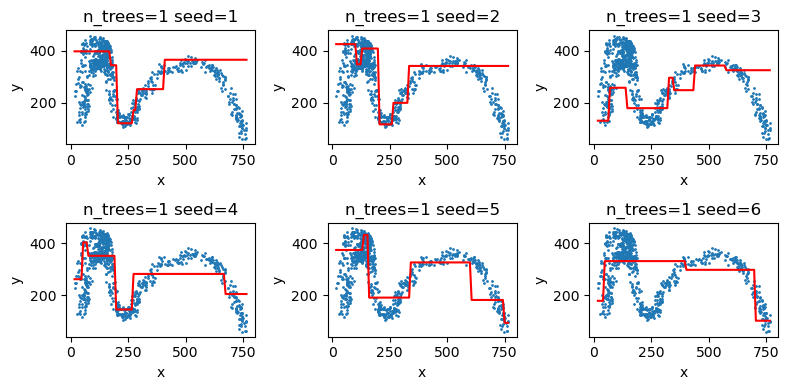

In [3]:
# make 6 different random forests with a single tree using different seed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# hide warnings
import warnings
warnings.filterwarnings('ignore')

layouts = '''
123
456
'''
fig, axs = plt.subplot_mosaic(layouts, figsize=(8, 4))

n_trees = [1]*6
data = pd.read_csv('data/simple.csv')
for i, n_tree in enumerate(n_trees, start=1):
    ax = axs[str(i)]
    data.plot.scatter(x='x', y='y', ax=ax, title=f'n_trees={n_tree} seed={i}', s=1)
    # change random_state to get different trees
    clf = RandomForestRegressor(n_estimators=n_tree, max_depth=3, max_samples=.01, random_state=i)
    clf.fit(data[['x']], data['y'])
    x = pd.DataFrame({'x': np.linspace(data.x.min(), data.x.max(), 100)})
    y = clf.predict(x)
    ax.plot(x, y, c='red')

fig.tight_layout()
    


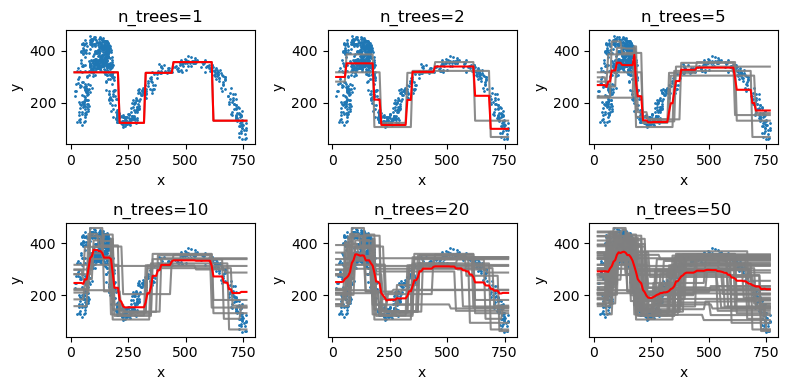

In [4]:
# illustrate random forest vs single tree
# note that making max_samples very small is a way to make the trees more different
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# hide warnings
import warnings
warnings.filterwarnings('ignore')

layouts = '''
123
456
'''
fig, axs = plt.subplot_mosaic(layouts, figsize=(8, 4))

n_trees = [1, 2, 5, 10, 20 , 50]
data = pd.read_csv('data/simple.csv')
for i, n_tree in enumerate(n_trees, start=1):
    ax = axs[str(i)]
    data.plot.scatter(x='x', y='y', ax=ax, title=f'n_trees={n_tree}', s=1)
    # play with max_depth and max_samples to see how they affect the trees
    rf = RandomForestRegressor(n_estimators=n_tree, max_depth=3, max_samples=.01, random_state=42)
    rf.fit(data[['x']], data['y'])
    x = pd.DataFrame({'x': np.linspace(data.x.min(), data.x.max(), 100)})

    # loop over trees and plot them
    for i, tree in enumerate(rf.estimators_):
        y = tree.predict(x)
        ax.plot(x, y, c='grey', alpha=.9)
    y = rf.predict(x)
    ax.plot(x, y, c='red')

fig.tight_layout()


In [5]:
from ipywidgets import interact, IntSlider, FloatSlider
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# hide warnings
import warnings
warnings.filterwarnings('ignore')


def plot_random_forest(data_path, max_depth, max_samples):
  """
  Plots random forest predictions for different numbers of trees.

  Args:
      data_path (str): Path to the CSV file containing data.
      max_depth (int): Maximum depth of the trees.
      max_samples (float): Proportion of samples to draw for each tree.
  """
  layouts = '''
  123456
  '''
  plt.close('all')
  fig, axs = plt.subplot_mosaic(layouts, figsize=(18, 4))
  n_trees = [1, 2, 5, 10, 20, 50]
  data = pd.read_csv(data_path)
  for i, n_tree in enumerate(n_trees, start=1):
      ax = axs[str(i)]
      data.plot.scatter(x='x', y='y', ax=ax, title=f'n_trees={n_tree}', s=1)

      rf = RandomForestRegressor(n_estimators=n_tree, 
                                 max_depth=max_depth, 
                                 max_samples=max_samples, 
                                 random_state=42)
      rf.fit(data[['x']], data['y'])
      x = pd.DataFrame({'x': np.linspace(data.x.min(), data.x.max(), 100)})

      # loop over trees and plot them
      for i, tree in enumerate(rf.estimators_):
          y = tree.predict(x)
          ax.plot(x, y, c='grey', alpha=.9)
      y = rf.predict(x)
      ax.plot(x, y, c='red')
  plt.show()


# Define sliders
max_depth_slider = IntSlider(min=1, max=10, value=3, description="Max Depth")
max_samples_slider = FloatSlider(min=0.01, max=1.0, step=0.01, value=0.1, description="Max Samples")

# Update the plot whenever the slider values change
interact(plot_random_forest, 
         data_path="data/simple.csv", 
         max_depth=max_depth_slider, 
         max_samples=max_samples_slider)

# as we raise the depth, the trees become more complex
# as we raise the samples, the prediction becomes smoother

ModuleNotFoundError: No module named 'ipywidgets'

## Random Forest Example

A Random Forest is a popular ensemble method that utilizes bagging. It builds a multitude of decision trees at training time and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. It is known for its robustness and ease of use without extensive hyperparameter tuning.


In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import set_config

set_config(transform_output='pandas')

In [7]:
# Load the dataset
adult_data = fetch_openml(data_id=1590)  # Adult census income dataset
X = adult_data.data
y = adult_data.target

In [16]:
# create local parquet file
(X
 .assign(y=y)
 .to_parquet('data/adult.parquet')
)

In [8]:
adult = pd.read_parquet('data/adult.parquet')
X = (adult.drop(columns='y'))
y = adult.y
     

In [9]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [10]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: y, Length: 48842, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [11]:
# check for missing values
X.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

In [12]:
X.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,46043,8,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,46033,14,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# check out my Applied Machine Learning: Feature Engineering course for more details
# make pipeline to handle categorical data
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

categorical_features = X.select_dtypes(include=['category']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [14]:
# using a technique called one-hot encoding (or dummy encoding) to encode the categorical variables
# Note that age is numerical so we don't want to apply one-hot encoding to it
categorical_transformer.fit_transform(X.iloc[:, :2])

,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,age_90,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_missing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48840,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# only encode the categorical features
categorical_transformer.fit_transform(X[categorical_features])

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_missing,education_10th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_missing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48840,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
# try just a decision tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# pipeline with decision tree
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.3f}')



Model Accuracy: 0.818


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# pipeline with random forest
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.3f}')

Model Accuracy: 0.826


## Parameter Tuning for Random Forest

While Random Forest is quite robust, tuning its hyperparameters can significantly boost performance. Key parameters include the number of trees (n_estimators), the maximum depth of each tree (max_depth), and the number of features to consider for each split (max_features).

In [39]:
# tune number of trees
import pandas as pd

scores_0 = []
training_scores_0 = []
n_estimators = [10, 50, 100, 150, 200, 250, 300]
for n in n_estimators:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=n , random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores_0.append(accuracy) 
    training_predictions = pipeline.predict(X_train)
    training_accuracy = accuracy_score(y_train, training_predictions)
    training_scores_0.append(training_accuracy)


<Axes: title={'center': 'Random Forest Classifier Accuracy vs Number of Trees'}, xlabel='n_estimators', ylabel='Accuracy'>

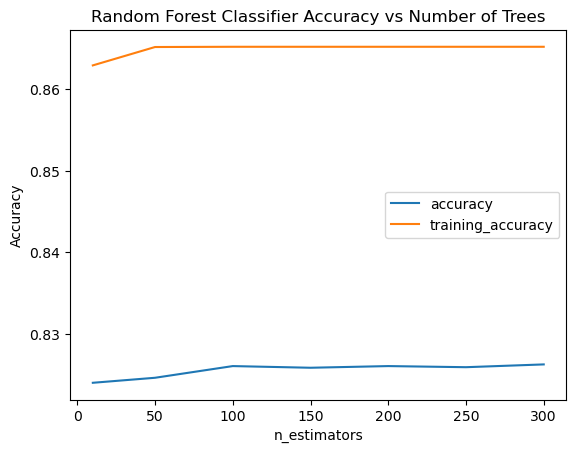

In [44]:
(pd.DataFrame({'n_estimators': n_estimators, 'accuracy': scores_0, 'training_accuracy': training_scores_0})
 .set_index('n_estimators')
    .plot(title='Random Forest Classifier Accuracy vs Number of Trees', ylabel='Accuracy'))

In [43]:
pd.DataFrame({'n_estimators': n_estimators, 'accuracy': scores_0, 'training_accuracy': training_scores_0})

,n_estimators,accuracy,training_accuracy
0,10,0.823995,0.862909
1,50,0.824609,0.865161
2,100,0.826042,0.865191
3,150,0.825838,0.865191
4,200,0.826042,0.865191
5,250,0.825906,0.865191
6,300,0.826247,0.865191



## Challenge: Tune Random Forest Parameters

Task: Improve the model accuracy by tuning the 'max_depth' parameter.

In [25]:
scores = []
training_scores = []
n_estimators = [10, 50, 75, 100]
max_depth = [5,10,15,20,25,30,35]

for n in n_estimators:
    for m in max_depth:
        
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(n_estimators=n , random_state=42, max_depth=m))
        ])
        pipeline.fit(X_train, y_train)
        predictions = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        #scores.append(accuracy) 
        training_predictions = pipeline.predict(X_train)
        training_accuracy = accuracy_score(y_train, training_predictions)
        #training_scores.append(training_accuracy)

        scores.append({ 'estimators': n, 'max_depth': m , 'score' : accuracy, 'training_scores' : training_accuracy })    




In [29]:
pd_score = pd.DataFrame.from_dict(scores)

In [30]:
pd_score.head()

,estimators,max_depth,score,training_scores
0,10,5,0.810755,0.811489
1,10,10,0.829045,0.831145
2,10,15,0.830751,0.842435
3,10,20,0.829728,0.853900
4,10,25,0.826588,0.859282



## Solution: Tune Random Forest Parameters


In [31]:
df_scores_pivot = pd_score.pivot(index='estimators', columns=['max_depth'], values=['score','training_scores'])
df_scores_pivot.round(3)

score                                           training_scores  \
max_depth      5      10     15     20     25     30     35              5    
estimators                                                                    
10          0.811  0.829  0.831  0.830  0.827  0.825  0.823           0.811   
50          0.805  0.829  0.832  0.831  0.829  0.826  0.826           0.804   
75          0.806  0.828  0.832  0.832  0.829  0.826  0.826           0.804   
100         0.805  0.829  0.832  0.832  0.828  0.826  0.826           0.804   

                                                      
max_depth      10     15     20     25     30     35  
estimators                                            
10          0.831  0.842  0.854  0.859  0.862  0.863  
50          0.833  0.844  0.855  0.863  0.865  0.865  
75          0.833  0.844  0.856  0.863  0.865  0.865  
100         0.832  0.845  0.855  0.863  0.865  0.865

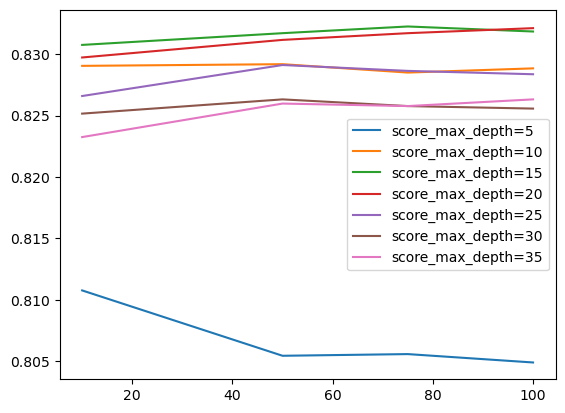

In [37]:
for d in max_depth:
    df_subset = pd_score[pd_score.max_depth == d]
    
    plt.plot(df_subset.estimators, df_subset.score,
             label='score_max_depth=%d' % d)

plt.legend()

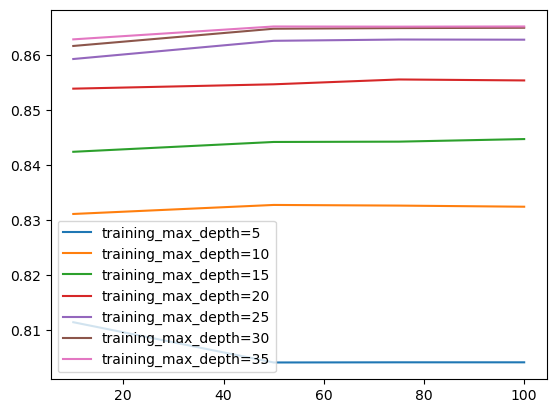

In [38]:
for d in max_depth:
    df_subset = pd_score[pd_score.max_depth == d]
    
    plt.plot(df_subset.estimators, df_subset.training_scores,
             label='training_max_depth=%d' % d)

plt.legend()

In [45]:
scores_2 = []
n_estimators_2 = [50, 60, 75, 80, 100]
max_depth_2 = [20,25,30,35,40,45]

for n in n_estimators_2:
    for m in max_depth_2:
        
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(n_estimators=n , random_state=42, max_depth=m))
        ])
        pipeline.fit(X_train, y_train)
        predictions = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        #scores.append(accuracy) 
        training_predictions = pipeline.predict(X_train)
        training_accuracy = accuracy_score(y_train, training_predictions)
        #training_scores.append(training_accuracy)

        scores_2.append({ 'estimators': n, 'max_depth': m , 'score' : accuracy, 'training_scores' : training_accuracy })    




In [46]:
pd_score = pd.DataFrame.from_dict(scores_2)

In [47]:
pd_score.head()

,estimators,max_depth,score,training_scores
0,50,20,0.831161,0.854690
1,50,25,0.829113,0.862587
2,50,30,0.826315,0.864781
3,50,35,0.825974,0.865191
4,50,40,0.824882,0.865161


In [49]:
df_scores_pivot = pd_score.pivot(index='estimators', columns=['max_depth'], values=['score','training_scores'])
df_scores_pivot

score                                                    \
max_depth         20        25        30        35        40        45   
estimators                                                               
50          0.831161  0.829113  0.826315  0.825974  0.824882  0.824814   
60          0.831366  0.829113  0.826452  0.826247  0.825292  0.825224   
75          0.831707  0.828636  0.825769  0.825769  0.825292  0.824951   
80          0.832253  0.828772  0.826179  0.825701  0.825155  0.824678   
100         0.832116  0.828363  0.825565  0.826315  0.825906  0.825292   

           training_scores                                                    
max_depth               20        25        30        35        40        45  
estimators                                                                    
50                0.854690  0.862587  0.864781  0.865191  0.865161  0.865161  
60                0.855275  0.862558  0.864781  0.865161  0.865132  0.865161  
75                0.855568  0.862821  0.864898  0.865161  0.865132  0.865161  
80                0.855275  0.862909  0.864986  0.865161  0.865132  0.865161  
100               0.855392  0.862792  0.864957  0.865191  0.865191  0.865191

# 3. Boosting and Gradient Boosting



## The Concept of Boosting

The key idea in boosting is to train models sequentially. With each model, the algorithm attempts to fix the errors made by the previous models. The base models are often simple, like decision stumps, and combined to form a stronger learner. Boosting is particularly effective in reducing bias and variance in the model predictions.

## AdaBoost: A Simple Boosting Example

AdaBoost (Adaptive Boosting) is a popular boosting algorithm. It is a meta-learner and can use different base learners.
We will use a Decision Tree Classifier as the base learner for AdaBoost in this example.

- First, it trains a model
- For subsequent models, it focuses more on the misclassified samples from the previous model (gives them a larger weight)

The final prediction is a weighted sum of the predictions from all the models.


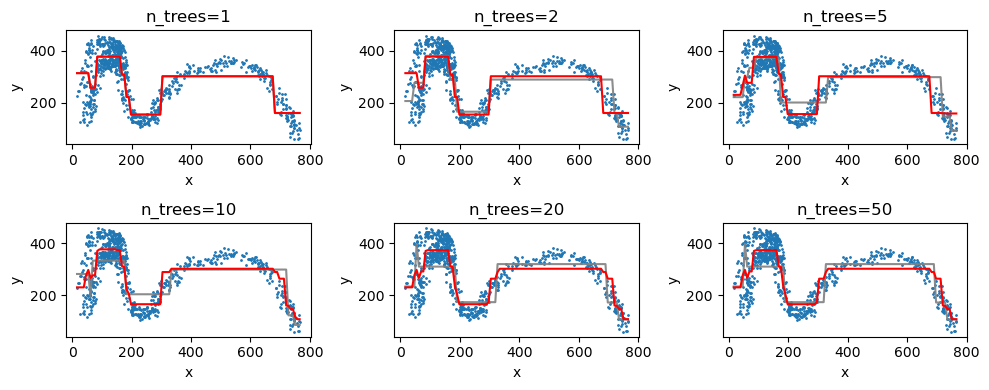

In [50]:
# illustrate random forest vs single tree
# note that making max_samples very small is a way to 
# make the trees more different
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

# hide warnings
import warnings
warnings.filterwarnings('ignore')

layouts = '''
123
456
'''
fig, axs = plt.subplot_mosaic(layouts, figsize=(10, 4))

n_trees = [1, 2, 5, 10, 20 , 50]
data = pd.read_csv('data/simple.csv')
for i, n_tree in enumerate(n_trees, start=1):
    ax = axs[str(i)]
    data.plot.scatter(x='x', y='y', ax=ax, title=f'n_trees={n_tree}', s=1)
    # play with max_depth and max_samples to see how they affect the trees
    clf = AdaBoostRegressor(n_estimators=n_tree, estimator=DecisionTreeRegressor(max_depth=3), random_state=42)
    #clf = AdaBoostRegressor(n_estimators=n_tree, random_state=42, estimator=LinearRegression())
    clf.fit(data[['x']], data['y'])
    x = pd.DataFrame({'x': np.linspace(data.x.min(), data.x.max(), 100)})

    # plot just the last tree in grey
    y = clf.estimators_[-1].predict(x)
    ax.plot(x, y, c='grey', alpha=.9)
    # plot the final prediction in red
    y = clf.predict(x)
    ax.plot(x, y, c='red')

fig.tight_layout()  

# note that in tree 2 the grey line is fixing the left side.

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', AdaBoostClassifier())
    ])

# Fit 
pipeline.fit(X_train, y_train)

# Evaluate
accuracy = accuracy_score(y_test, pipeline.predict(X_test))
print(f'Model Accuracy: {accuracy:.3f}')


Model Accuracy: 0.824


## Gradient Boosting

Gradient Boosting is another boosting algorithm that uses a gradient descent approach to minimize the loss of the combined model. 
Rather than focusing on the misclassified samples, Gradient Boosting fits the new model to the residual errors of the previous model.
Each new model aims to correct the mistakes of the previous ones by moving in the direction of the gradient that reduces loss.

In Gradient Boosting, decision trees are trained sequentially to fit the gradient of the loss function, perfecting errors from previous models. It's powerful for both regression and classification tasks.

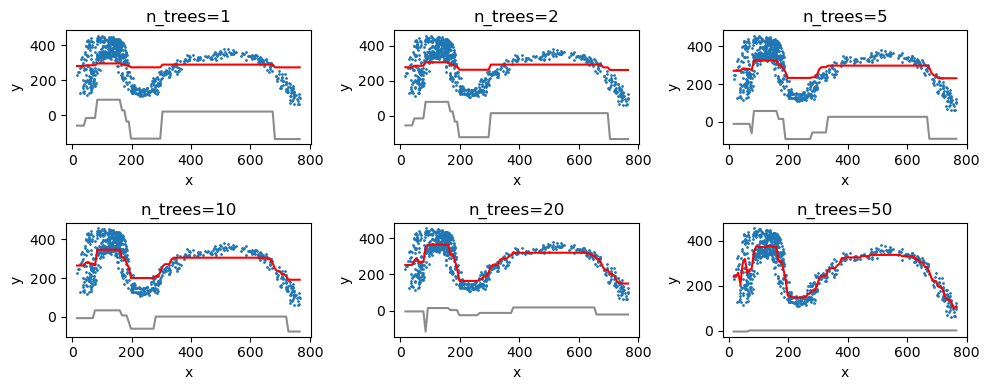

In [52]:
# illustrate random forest vs single tree
# note that making max_samples very small is a way to make the trees more different
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# hide warnings
import warnings
warnings.filterwarnings('ignore')

layouts = '''
123
456
'''
fig, axs = plt.subplot_mosaic(layouts, figsize=(10, 4))

n_trees = [1, 2, 5, 10, 20 , 50]
data = pd.read_csv('data/simple.csv')
for i, n_tree in enumerate(n_trees, start=1):
    ax = axs[str(i)]
    data.plot.scatter(x='x', y='y', ax=ax, title=f'n_trees={n_tree}', s=1)
    # play with max_depth and max_samples to see how they affect the trees
    clf = GradientBoostingRegressor(n_estimators=n_tree, random_state=42, max_depth=3)
    clf.fit(data[['x']], data['y'])
    x = pd.DataFrame({'x': np.linspace(data.x.min(), data.x.max(), 100)})
    # plot just the last tree in grey
    # GradientBoostingRegressor stores the trees in a numpy array
    y = clf.estimators_.flatten()[-1].predict(x)
    ax.plot(x, y, c='grey', alpha=.9)
    # plot the final prediction in red
    y = clf.predict(x)
    ax.plot(x, y, c='red')

fig.tight_layout()  

# the scikit learn implementation uses a dummy regressor initially
# each tree corrects the previous (thats why the grey line is bounding 0)
# You want to use "weak learners" so that you don't overfit (try changing the max_depth to 10)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier())
    ])

# Fit 
pipeline.fit(X_train, y_train)

# Evaluate
print(f'Model Accuracy: {accuracy:.3f}')

Model Accuracy: 0.824



## Hyperparameter Tuning for Boosting Models
Tuning hyperparameters is critical for maximizing the performance of boosting models.

Hyperparameters for AdaBoost include:

- `n_estimators`: Number of boosting stages to be run. (1, inf)
- `learning_rate`: Contribution of each model to the final prediction. (number between 0 and 1)
- `estimator`: The base estimator to fit on the training data. (Can set additional hyperparameters on the base estimator)

Key hyperparameters for Gradient Boosting include:

- `learning_rate`: Contribution of each tree to the final prediction. (0, 1]
- `n_estimators`: Number of boosting stages to be run. (1, inf)
- `max_depth`: Maximum depth of the individual trees. (1, inf)
- `subsample`: Fraction of samples used to fit the individual base learners. (0, 1]



<Axes: title={'center': 'Gradient Boosting Classifier Accuracy vs Number of Trees'}, xlabel='n_estimators', ylabel='Accuracy'>

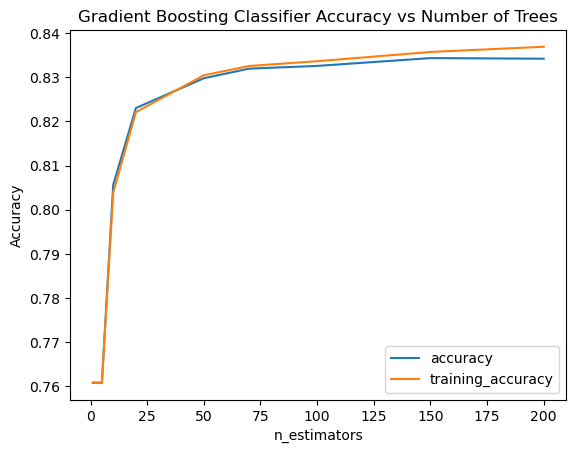

In [54]:
# tune number of trees
import pandas as pd

scores = []
training_scores = []
n_estimators = [1, 5, 10, 20, 50, 70, 100, 150, 200]
for n in n_estimators:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(n_estimators=n, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy) 
    training_predictions = pipeline.predict(X_train)
    training_accuracy = accuracy_score(y_train, training_predictions)
    training_scores.append(training_accuracy)

(pd.DataFrame({'n_estimators': n_estimators, 'accuracy': scores, 'training_accuracy': training_scores})
 .set_index('n_estimators')
    .plot(title='Gradient Boosting Classifier Accuracy vs Number of Trees', ylabel='Accuracy'))




## Challenge: Tune AdaBoost Model

Your task is to optimize the `max_depth` parameter of an AdaBoost model to achieve higher accuracy.


In [60]:
# tune number of trees
import pandas as pd

scores = []
training_scores = []
n_estimators = [1, 5, 10, 20, 50, 70, 100, 150, 200]
max_depth = [2,4,5,6,8]
for n in n_estimators:
    for m in max_depth: 
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', GradientBoostingClassifier(n_estimators=n, max_depth=m,random_state=42))
        ])
        pipeline.fit(X_train, y_train)
        predictions = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)

        training_predictions = pipeline.predict(X_train)
        training_accuracy = accuracy_score(y_train, training_predictions)

        training_scores.append({'estimators':n,'max_depth':m,'scores':accuracy,'training_scores':training_accuracy})




In [61]:
pd_score = pd.DataFrame.from_dict(training_scores)

In [62]:
df_scores_pivot = pd_score.pivot(index='estimators', columns=['max_depth'], values=['scores','training_scores'])
df_scores_pivot

scores                                         training_scores  \
max_depth          2         4         5         6         8               2   
estimators                                                                     
1           0.760732  0.760732  0.760732  0.760732  0.760732        0.760713   
5           0.760732  0.760732  0.767010  0.769262  0.770354        0.760713   
10          0.760732  0.812393  0.816966  0.818945  0.821402        0.760713   
20          0.807138  0.825906  0.828158  0.829932  0.830615        0.804967   
50          0.826452  0.830615  0.832662  0.832458  0.831297        0.827810   
70          0.827476  0.831639  0.833549  0.834027  0.832116        0.828863   
100         0.828636  0.833618  0.833618  0.834368  0.831434        0.829156   
150         0.831570  0.833413  0.834437  0.833618  0.830001        0.832080   
200         0.832253  0.834778  0.834232  0.832526  0.829182        0.833426   

                                                    
max_depth          4         5         6         8  
estimators                                          
1           0.760713  0.760713  0.760713  0.760713  
5           0.760713  0.768054  0.770101  0.771798  
10          0.810144  0.816461  0.819913  0.826055  
20          0.827167  0.830706  0.834069  0.839393  
50          0.834391  0.836205  0.840007  0.848372  
70          0.834947  0.838428  0.843341  0.850361  
100         0.837345  0.840270  0.844862  0.852379  
150         0.839451  0.843341  0.847202  0.854602  
200         0.841031  0.844950  0.848723  0.856796

## Solution: Tune AdaBoost Model

#  XGBoost

XGBoost, short for eXtreme Gradient Boosting, is an advanced implementation of gradient boosting developed by Tianqi Chen. It is known for its efficiency, speed, and predictive accuracy, making it a popular choice among data scientists.


Why use XGBoost vs the Gradient Boosting Classifier in scikit-learn?
- XGBoost is specifically designed to optimize computational speed and model performance.
- Has regularization techniques to avoid overfitting.
- Supports parallel processing and distributed computing for large datasets.
- Provides a variety of objective functions and evaluation criteria for regression, classification, and ranking problems.
- Handles missing data.
- Handles categorical features.




## Hands-on Coding with XGBoost

To start using XGBoost, ensure that the XGBoost library is installed in your Python environment. 

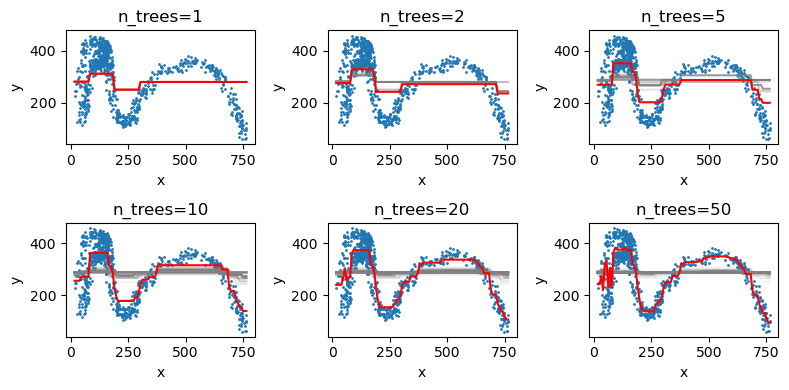

In [63]:
# illustrate random forest vs single tree
# note that making max_samples very small is a way to make the trees more different
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import XGBRegressor


# hide warnings
import warnings
warnings.filterwarnings('ignore')

layouts = '''
123
456
'''
fig, axs = plt.subplot_mosaic(layouts, figsize=(8, 4))

n_trees = [1, 2, 5, 10, 20 , 50]
data = pd.read_csv('data/simple.csv')
for i, n_tree in enumerate(n_trees, start=1):
    ax = axs[str(i)]
    data.plot.scatter(x='x', y='y', ax=ax, title=f'n_trees={n_tree}', s=1)
    # play with max_depth and max_samples to see how they affect the trees
    rf = XGBRegressor(n_estimators=n_tree, #estimator=DecisionTreeRegressor(max_depth=3),
                      max_depth=2,
                       random_state=42)
    rf.fit(data[['x']], data['y'])
    x = pd.DataFrame({'x': np.linspace(data.x.min(), data.x.max(), 100)})

    # loop over trees and plot them
    for z, j in enumerate(range(n_tree)):
        y = rf.predict(x, iteration_range=(j, j+1))
        # increase alpha based on z to make latter trees more visible
        ax.plot(x, y, c='grey', alpha=(z+1)/n_tree)
    y = rf.predict(x)
    # plot the final prediction in red
    ax.plot(x, y, c='red')

plt.tight_layout()

# you can see n tree = 2 the right side is fixed by the second tree

In [64]:
# no pipeline needed! it handles categorical data (and missing values) internally
from xgboost import XGBClassifier

model = XGBClassifier(enable_categorical=True)
model.fit(X_train, y_train=='>50K')
accuracy = accuracy_score(y_test=='>50K', model.predict(X_test))
print(f'Model Accuracy: {accuracy:.3f}')

Model Accuracy: 0.874



## Hyperparameter Tuning for XGBoost
XGBoost is rich in hyperparameters that, when tuned properly, can significantly enhance model performance. The primary tuning parameters include:
- `max_depth`: Maximum depth of a tree. Increasing this value makes the model more complex and, hence, more likely to overfit. [0, inf)
- `eta`: Step size shrinkage is used in the update to prevent overfitting. (0, 1]
- `subsample`: Proportion of training instances used in trees; reduces overfitting. (0, 1]
- `colsample_bytree`: The fraction of features used from each column helps with overfitting. (0, 1]
- `gamma`: Minimum loss reduction required to make a further partition on a leaf node of the tree. L0 regularization term. [0, inf)



<Axes: title={'center': 'XGBoost Classifier Accuracy vs Depth of Trees'}, xlabel='max_depth', ylabel='Accuracy'>

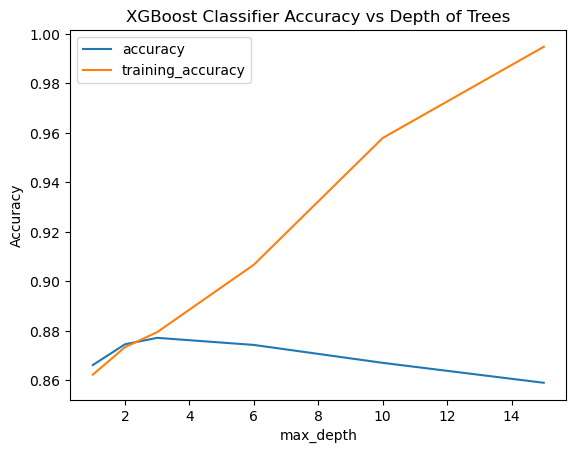

In [65]:
scores = []
training_scores = []
values = [1, 2, 3, 6, 10, 15]
for value in values:
    model = XGBClassifier(enable_categorical=True, max_depth=value)
    model.fit(X_train, y_train=='>50K')
    scores.append(accuracy_score(y_test=='>50K', model.predict(X_test)))
    training_scores.append(accuracy_score(y_train=='>50K', model.predict(X_train)))

pd.DataFrame({'max_depth': values, 'accuracy': scores, 'training_accuracy': training_scores}).set_index('max_depth').plot(title='XGBoost Classifier Accuracy vs Depth of Trees', ylabel='Accuracy')

In [66]:
xg_tuned = XGBClassifier(enable_categorical=True, max_depth=3)
xg_tuned.fit(X_train, y_train=='>50K')
accuracy = accuracy_score(y_test=='>50K', xg_tuned.predict(X_test))
print(f'Model Accuracy: {accuracy:.3f}')

Model Accuracy: 0.877


## Challenge: Tune XGBoost Model

What value of `gamma` maximizes accuracy?


<Axes: title={'center': 'XGBoost Classifier Accuracy vs Gamma'}, xlabel='max_depth', ylabel='Accuracy'>

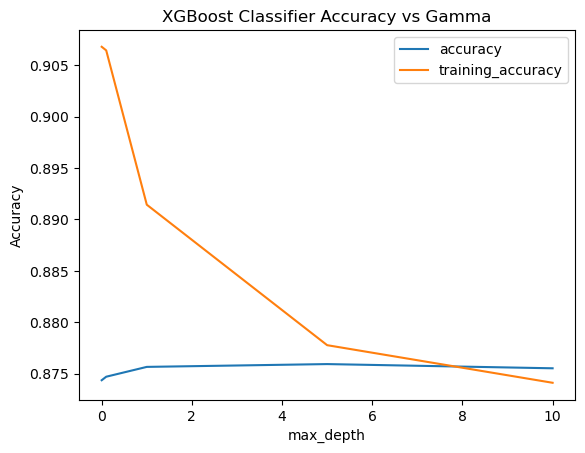

In [69]:
scores = []
training_scores = []
values = [0,0.1,1,5,10]
for value in values:
    model = XGBClassifier(enable_categorical=True, gamma=value)
    model.fit(X_train, y_train=='>50K')
    scores.append(accuracy_score(y_test=='>50K', model.predict(X_test)))
    training_scores.append(accuracy_score(y_train=='>50K', model.predict(X_train)))

pd.DataFrame({'max_depth': values, 'accuracy': scores, 'training_accuracy': training_scores}).set_index('max_depth').plot(title='XGBoost Classifier Accuracy vs Gamma', ylabel='Accuracy')


## Solution: Tune XGBoost Model



# Stacking
## Concept of Stacking
Stacking, also known as stacked generalization, is an ensemble machine learning algorithm. Unlike other ensemble methods, which are typically based on a single type of model, stacking focuses on combining different base models to improve predictive performance. The core idea is to train a meta-model (also known as a blender or second-level model) to combine predictions from multiple base models.



## Hands-on Coding with Stacking

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

# Define base models
estimators = [
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('nn', KNeighborsClassifier(n_neighbors=3)),
]
model = StackingClassifier(estimators=estimators)

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

model.fit(pipeline.fit_transform(X_train), y_train)
accuracy = accuracy_score(y_test, model.predict(pipeline.transform(X_test)))
print(f'Model Accuracy: {accuracy:.3f}')

Model Accuracy: 0.822


## Evaluation: Stacking vs Individual Models

Now, let's compare the performance of the stacking model with its individual base models. Observe how the stacked model often outperforms the single models by combining their strengths.


In [71]:

# Evaluate each individual model
for name, clf in estimators:
    clf.fit(pipeline.fit_transform(X_train), y_train)
    test_score = clf.score(pipeline.transform(X_test), y_test)
    print(f"{name} model score: {test_score:.4f}")

# Evaluate stacking model
test_score = model.score(pipeline.transform(X_test), y_test)
print(f"Stacking model score: {test_score:.4f}")

dt model score: 0.8103
nn model score: 0.8039
Stacking model score: 0.8215



## Challenge: Create a Stacked Model
Try creating your own stacked model using different base models. You can experiment with models like Support Vector Machines, Decision Trees with different depths, or even different ensemble methods.



## Solution: Create a Stacked Model

